# KNN Wines Classifier
In this case study, we will analyze a dataset consisting of an assortment of winesclassified as "high quality" 
and "low quality" and will use the k-Nearest Neighbors classifier to determine whether or not other information about the wine helps us correctly predict whether a new wine will be of high quality.

Our first step is to import the dataset, and we will inspect the dataset and perform some mild data cleaning.

In [10]:
import pandas as pd
wines_data = pd.read_csv("wine.csv")
wines_data.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


drop the non numeric column

In [6]:
numeric_data = wines_data.drop("color", axis=1)

We want to ensure that each variable contributes equally to the kNN classifier, so we will need to scale the data by subtracting the mean of each column and dividing each column by its standard deviation "Standardize the Data "scale the features in your data".

In [8]:
import sklearn.preprocessing
scaled_data = sklearn.preprocessing.scale(numeric_data)
numeric_data = pd.DataFrame(scaled_data, columns = numeric_data.columns)
numeric_data.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,high_quality
0,-1.421571,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,-1.313488
1,-1.420875,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230,-1.313488
2,-1.420179,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230,-1.313488
3,-1.419483,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999,0.761331
4,-1.418787,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,-1.313488


Then, we will use principal components to take a linear snapshot of the data from several different angles, with each snapshot ordered by how well it aligns with variation in the data. In this exercise, we will scale the numeric data and extract the first two principal components.

In [15]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=2)
principal_components = pca.fit_transform(numeric_data)
principal_components = pca.fit(numeric_data).transform(numeric_data)

In [28]:
principal_components

array([[ 3.89268613, -0.46837634],
       [ 3.97074861,  0.05360247],
       [ 3.8850939 , -0.16893833],
       ...,
       [-1.57067368, -0.37999173],
       [-2.67094421, -3.10713939],
       [-2.47492707, -2.08775282]])

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 14 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 24.28% of the variance and the second principal component contains 20.63% of the variance. Together, the two components contain 44.92% of the information.

In [18]:
pca.explained_variance_ratio_

array([0.24282984, 0.20631217])

we will plot the first two principal components of the covariates in the dataset. The high and low quality wines will be colored using red and blue.

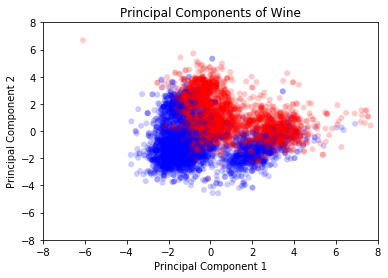

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.backends.backend_pdf import PdfPages
observation_colormap = ListedColormap(['red', 'blue'])
x =  principal_components[:,0]
y = principal_components[:,1]

plt.title("Principal Components of Wine")
plt.scatter(x, y, alpha = 0.2,
    c = data['high_quality'], cmap = observation_colormap, edgecolors = 'none')
plt.xlim(-8, 8); plt.ylim(-8, 8)
plt.xlabel("Principal Component 1"); plt.ylabel("Principal Component 2")
plt.show()


Then we will create a function that calculates the accuracy between predictions and outcomes.

In [24]:
import numpy as np
def accuracy(predictions, outcomes):
    """
    Finds the percent of predictions that equal outcomes.
    """
    return 100 * np.mean(predictions == outcomes)
    return count
x = np.array([1,2,3])
y = np.array([1,2,4])
print (accuracy(x, y))

66.66666666666666


The dataset remains stored as data. Because most wines in the dataset are classified as low quality, one very simple classification rule is to predict that all wines are of low quality. Here, we determine the accuracy of this simple rule. 

In [25]:
accuracy(0, wines_data["high_quality"])

36.69385870401724

will use the kNN classifier from scikit-learn to predict the quality of wines in our dataset. Use knn.predict(numeric_data) to predict which wines are high and low quality and store the result as library_predictions

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(numeric_data, data['high_quality'])

library_predictions = knn.predict(numeric_data)
accuracy(library_predictions, wines_data["high_quality"])

99.96921656148992

Unlike the scikit-learn function, our homemade kNN classifier does not take any shortcuts in calculating which neighbors are closest to each observation, so it is likely too slow to carry out on the whole dataset. So , we will select a subset of our data to use in our homemade kNN classifier "select 10 rows from the dataset ".

In [30]:
import random
n_rows = wines_data.shape[0]

random.seed(123)
selection = random.sample(range(n_rows), 10)